Задание 4. Используя модель Word2vec постройте эмбеддинги и визуализируйте их. Сделать выводы.

[nltk_data] Downloading package punkt to /home/qtr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


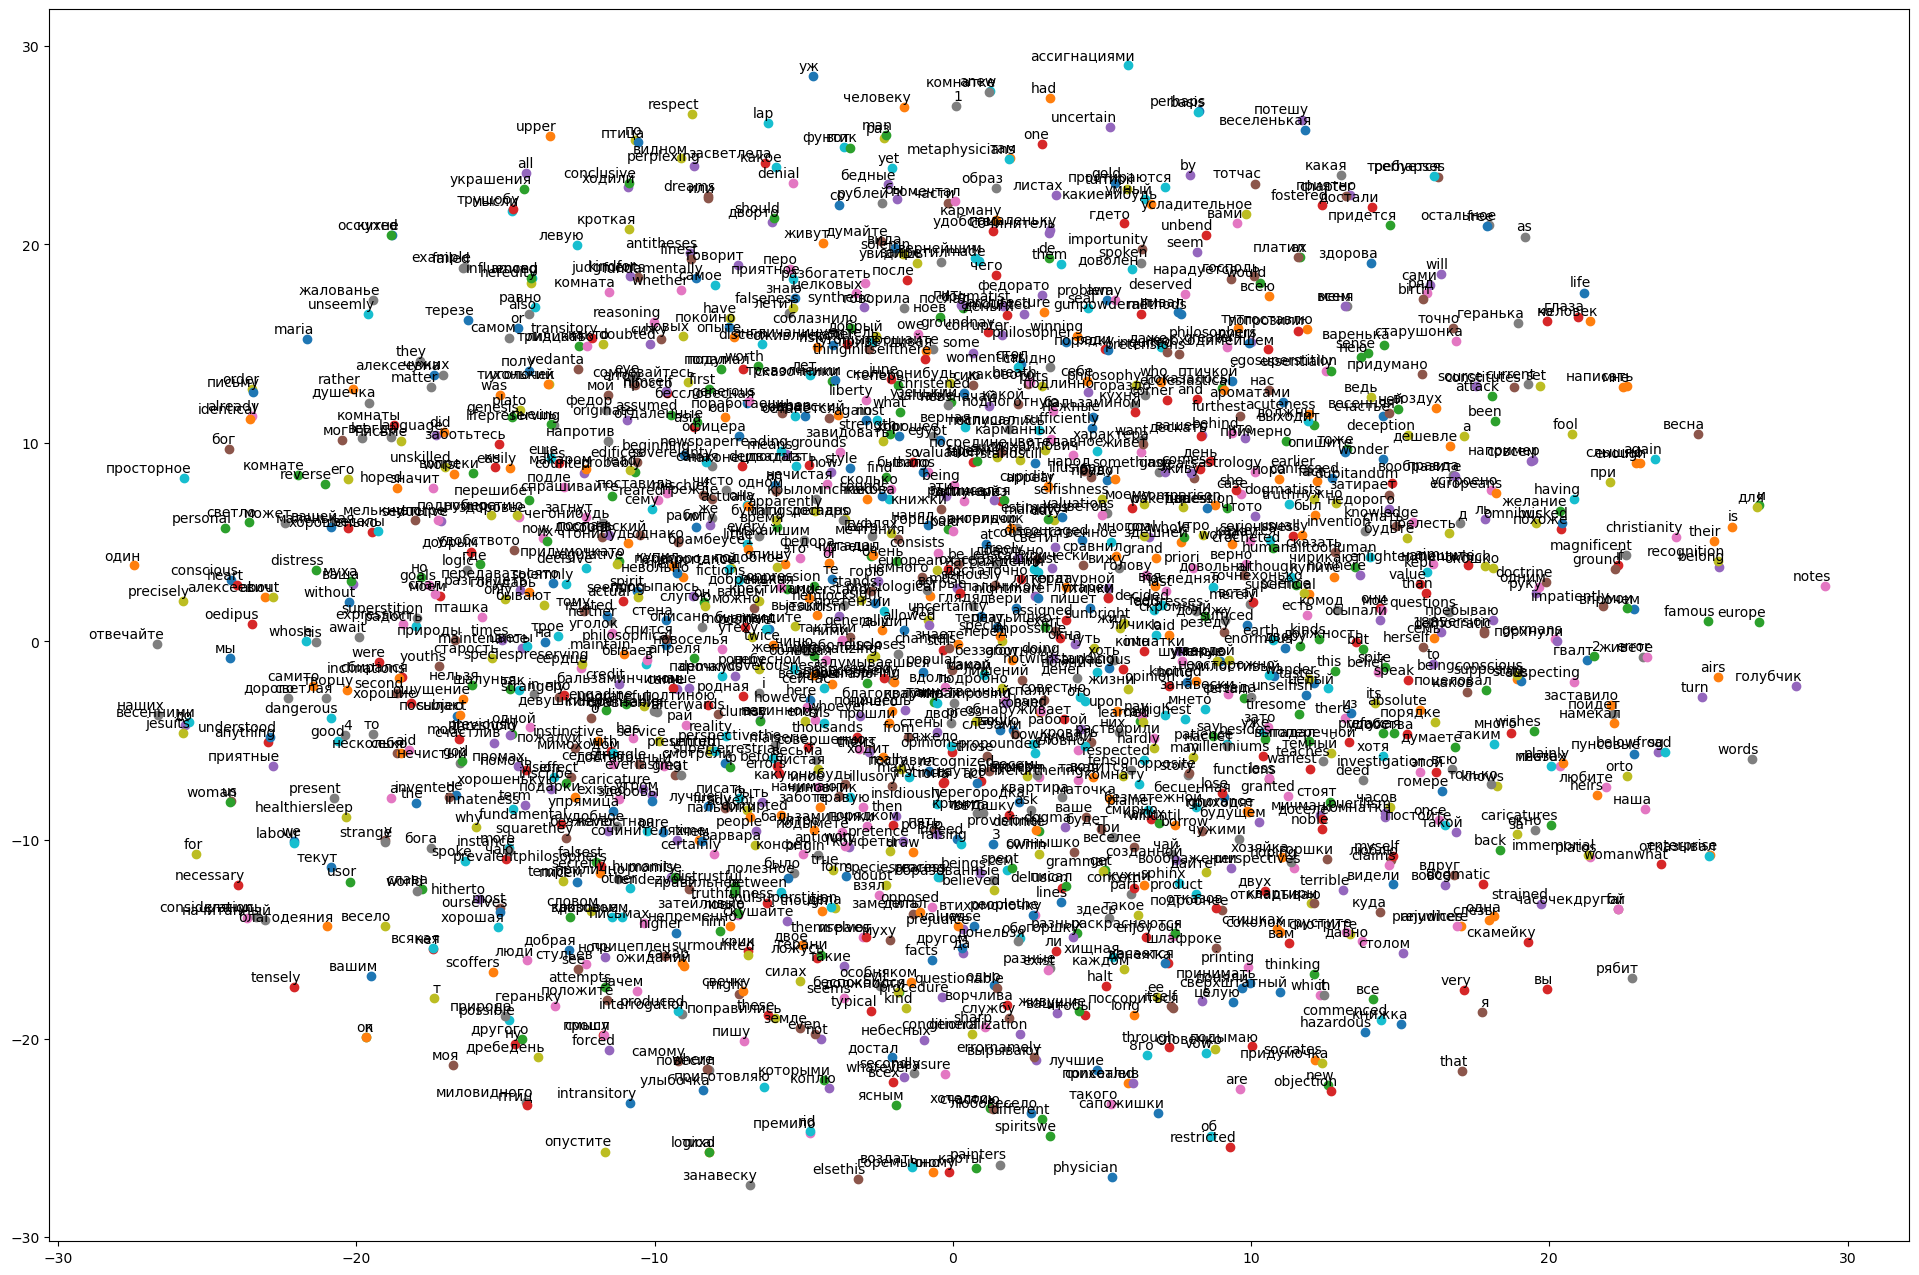

In [8]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import re
import os
import numpy as np
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

def tokenize(text):
    return word_tokenize(text, language='russian')

with open('dostoevsky75.txt', 'r', encoding='utf-8') as file:
    dostoevsky_text = preprocess_text(file.read(10000))

with open('nietzsche.txt', 'r', encoding='utf-8') as file:
    nietzsche_text = preprocess_text(file.read(10000))

dostoevsky_tokens = tokenize(dostoevsky_text)
nietzsche_tokens = tokenize(nietzsche_text)

texts = [dostoevsky_tokens, nietzsche_tokens]

model = Word2Vec(texts, vector_size=100, window=5, min_count=1, workers=os.cpu_count())

def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(24, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)

# вывод

русское слово "ясно" и его формы,  а также англоязычное слово "up" встречались чаще всего